<a href="https://colab.research.google.com/github/Azimoj/Customer-Segmentation/blob/main/POLIST_02_notebookessais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
%pylab inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/My\Drive/p5
!ls

df = pd.read_csv(
    '/content/drive/MyDrive/p5/data_feature_eng.csv')

/content/drive/MyDrive/p5
data_feature_eng.csv		  olist_sellers_dataset.csv
olist_order_payments_dataset.csv  p5
olist_order_reviews_dataset.csv   POLIST_02_notebookessais.ipynb
olist_orders_dataset.csv	  product_category_name_translation.csv
olist_products_dataset.csv


In [7]:
pd.set_option('display.max_columns', None)
df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,zip_code_prefix_customer,customer_city,customer_state,geolocation_lat_customer,geolocation_lng_customer,geolocation_city_customer,geolocation_state_customer,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_id,seller_id,shipping_limit_date,price,freight_value,zip_code_prefix_seller,seller_city,seller_state,geolocation_lat_seller,geolocation_lng_seller,geolocation_city_seller,geolocation_state_seller,product_category_name,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,4ce650e117a5b292bf5ea980a61eb61e,1,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,-17.851690,-41.493610,teofilo otoni,MG,af74cc53dcffc8384b29e7abfa41902b,57.0,921.0,8.0,800.0,17.0,27.0,17.0,1,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,13321,salto,SP,-23.190244,-47.291571,salto,SP,home_construction,2018,4,Apr,201804,20180425,25,2,Wed,22,Night
1,b545ba7b0bd67a3128185c7214704319,1,credit_card,8,340.08,7e2ca73af071679902a9ba14d7c3cee8,delivered,2018-06-11 14:59:24,2018-06-11 16:31:42,2018-06-12 14:15:00,2018-06-18 16:41:04,2018-07-04 00:00:00,5f65ad4b5147b940da2da6802f18bbf7,4,NaN,NaN,2018-06-19 00:00:00,2018-06-19 20:20:45,55020cb68ae358a51969695657a54e9c,15520,valentim gentil,SP,-20.421158,-50.086044,valentim gentil,SP,2233b59e8cf2817f9659e52cce3093de,58.0,1624.0,3.0,9350.0,20.0,20.0,20.0,1,e3d3b3efac954a60d61be70b7e05b49b,2018-06-15 15:20:20,316.05,24.03,3370,sao paulo,SP,-23.567995,-46.557625,sao paulo,SP,home_construction,2018,6,Jun,201806,20180611,11,0,Mon,14,Afternoon
2,6a26bd1a037993f1205073dbeda67db4,1,credit_card,2,67.12,2a44b3dbad360783fd663c15c3e6367c,delivered,2018-02-15 13:53:42,2018-02-15 14:10:28,2018-02-16 22:38:59,2018-03-02 22:29:04,2018-03-08 00:00:00,fad89f16742c04dcdfec38fd6c115561,4,NaN,"Otimo produto recebir no prazo certo,recomento",2018-03-03 00:00:00,2018-03-04 20:25:59,aca152a8bcfa7d7059b7787c67d60d52,13295,itupeva,SP,-23.159152,-47.058208,itupeva,SP,679a3e5e1d2bb68982be5734c6e55e63,57.0,565.0,4.0,800.0,38.0,38.0,22.0,1,8a130737016f838139d31878787a39c9,2018-02-21 13:10:28,54.40,12.72,3187,sao paulo,SP,-23.566231,-46.580203,sao paulo,SP,home_construction,2018,2,Feb,201802,20180215,15,3,Thu,13,Afternoon
3,1fce50c1831b6809773e5020edc716e2,1,credit_card,2,36.16,1ddcc619647ca008fdc24f8302c8573f,delivered,2018-07-24 20:08:54,2018-07-25 20:05:09,2018-07-26 16:04:00,2018-07-30 17:20:59,2018-08-07 00:00:00,bc0fa803dc47267d440652c24692784d,3,NaN,NaN,2018-07-31 00:00:00,2018-08-01 09:12:07,9aa679326b151fc564c2a238f361aa7d,5678,sao paulo,SP,-23.597505,-46.704756,sao paulo,SP,cce794ab6b84d0345332bb1910f9eb20,60.0,843.0,1.0,275.0,20.0,11.0,19.0,1,165b1235e9e9942cb5fae67103576fb0,2018-07-31 20:05:09,21.70,14.46,14020,ribeirao preto,SP,-21.210105,-47.801390,ribeirao preto,SP,home_construction,2018,7,Jul,201807,20180724,24,1,Tue,20,Night
4,107f069fdb62a9cbe252b043323e4e32,1,credit_card,2,175.13,ef0ce737cbf4c0d6aefb7c7281b658e3,delivered,2018-05-18 08:24:28,2018-05-18 08:55:36,2018-05-24 09:45:00,2018-06-12 18:18:45,2018-06-07 00:00:00,4d18eb591789b7687cf69ad6d6d4485c,5,Não recebi,Nã

In [8]:
features = ['order_id', 'order_status', 'order_purchase_timestamp',
       'payment_value', 'customer_unique_id', 'zip_code_prefix_customer','order_item_id',
       'customer_city', 'customer_state','order_purchase_date','order_delivered_customer_date','price','freight_value']
dff = df[features]
dff.shape

(116581, 13)

In [9]:
Olist_db= dff.copy()

In [12]:
Olist_db.isnull().sum()

order_id                         0
order_status                     0
order_purchase_timestamp         0
payment_value                    0
customer_unique_id               0
zip_code_prefix_customer         0
order_item_id                    0
customer_city                    0
customer_state                   0
order_purchase_date              0
order_delivered_customer_date    0
price                            0
freight_value                    0
dtype: int64

In [11]:
Olist_db.dropna(inplace=True)

In [13]:
Olist_db.describe()

,payment_value,zip_code_prefix_customer,order_item_id,order_purchase_date,price,freight_value
count,114066.000000,114066.000000,114066.000000,1.140660e+05,114066.000000,114066.000000
mean,172.135500,35081.680133,1.197500,2.017603e+07,120.008792,20.010184
std,266.139258,29849.608164,0.703142,4.870590e+03,182.426455,15.726425
min,0.000000,1003.000000,1.000000,2.016100e+07,0.850000,0.000000
25%,60.960000,11310.000000,1.000000,2.017091e+07,39.900000,13.080000
50%,108.065000,24320.000000,1.000000,2.018012e+07,74.900000,16.320000
75%,189.370000,58801.750000,1.000000,2.018050e+07,133.000000,21.190000
max,13664.080000,99980.000000,21.000000,2.018083e+07,6735.000000,409.680000


In [15]:
cond = Olist_db["order_status"] == "delivered"
Olist_db = Olist_db.loc[cond]

In [16]:
out= Olist_db[Olist_db['payment_value']>= 8000]
out

,order_id,order_status,order_purchase_timestamp,payment_value,customer_unique_id,zip_code_prefix_customer,order_item_id,customer_city,customer_state,order_purchase_date,order_delivered_customer_date,price,freight_value
111624,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,1,rio de janeiro,RJ,20170929,2017-10-17 18:22:29,1680.0,28.01
111625,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,2,rio de janeiro,RJ,20170929,2017-10-17 18:22:29,1680.0,28.01
111626,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,3,rio de janeiro,RJ,20170929,2017-10-17 18:22:29,1680.0,28.01
111627,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,4,rio de janeiro,RJ,20170929,2017-10-17 18:22:29,1680.0,28.01
111628,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,5,rio de janeiro,RJ,20170929,2017-10-17 18:22:29,1680.0,28.01
111629,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,6,rio de janeiro,RJ,20170929,2017-10-17 18:22:29,1680.0,28.01
111630,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,7,rio de janeiro,RJ,20170929,2017-10-17 18:22:29,1680.0,28.01
111631,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,8,rio de janeiro,RJ,20170929,2017-10-17 18:22:29,1680.0,28.01


In [17]:
Olist_db=Olist_db[Olist_db['payment_value']<= 8000]

In [18]:
#le prix qu'un client paye lors de sa commande 
Olist_db['Montant_achat']=(Olist_db['price']*Olist_db['order_item_id'])+(Olist_db['freight_value']*Olist_db['order_item_id'])
#le prix de la livraison que le client paye 
Olist_db['Prix_Livraison']=(Olist_db['freight_value']*Olist_db['order_item_id'])
#le prix que le client paye avec  le nombre de produits quil a commande 
Olist_db['Prix_produit']=(Olist_db['price']*Olist_db['order_item_id'])

In [19]:
import datetime as dt

In [20]:
# Make the date_placed column datetime
Olist_db['order_purchase_timestamp'] = pd.to_datetime(Olist_db['order_purchase_timestamp'])

In [21]:
Olist_db['order_purchase_date'].max()

20180829

In [22]:
NOW = dt.datetime(2018,8,30)

rfmTable = Olist_db.groupby('customer_unique_id').agg({'order_purchase_timestamp': lambda x: ((NOW - x.max()).days)+1 , # Recency
                                        'order_id': lambda x: len(x),      # Frequency
                                        'Montant_achat': lambda x: x.sum()}).reset_index() # Monetary Value

rfmTable['order_purchase_timestamp'] = rfmTable['order_purchase_timestamp'].astype(int)
rfmTable.rename(columns={'order_purchase_timestamp': 'Recency', 
                         'order_id': 'Frequency', 
                         'Montant_achat': 'Monetary'}, inplace=True)

In [23]:
rfm_df= rfmTable[['Recency', 'Frequency', 'Monetary']]

In [24]:
from sklearn.preprocessing import StandardScaler

data_log = np.log(rfm_df)
scaler = StandardScaler()
scaler.fit(data_log)
data_normalized = scaler.transform(data_log)
data_normalized = pd.DataFrame(data=data_normalized, index=rfm_df.index, columns=rfm_df.columns)

In [25]:
data_normalized.head()

,Recency,Frequency,Monetary
0,-0.465063,-0.387568,0.181293
1,-0.437026,-0.387568,-1.685822
2,1.199536,-0.387568,-0.381710
3,0.655078,-0.387568,-1.151696
4,0.540391,-0.387568,0.551403


In [26]:
from sklearn.cluster import KMeans
#from sklearn import metrics, cluster
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.datasets import make_blobs

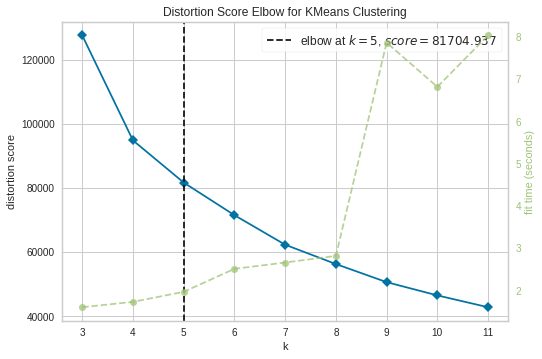

In [27]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,12))

visualizer.fit(data_normalized)   
visualizer.poof()

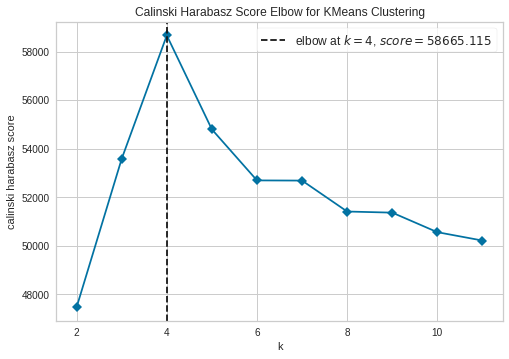

In [28]:
# Instantiate the clustering model and visualizer 
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric='calinski_harabasz', timings=False)

visualizer.fit(data_normalized)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

In [29]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [30]:
db = DBSCAN(eps=0.3).fit(data_normalized)

In [31]:
labels = db.labels_
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

In [32]:
print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 21
Estimated no. of noise points: 463


In [136]:
from sklearn import metrics
df = pd.DataFrame()
my_clust4 = KMeans(n_clusters=4, random_state=1)
my_clust4.fit(data_normalized)

for i in range(200):
    test = KMeans(n_clusters=4)
    test.fit_predict(data_normalized)
    ari = metrics.adjusted_rand_score(my_clust4.labels_, test.labels_)
    test = pd.DataFrame(test.cluster_centers_)
    test.columns = ['RecencyCor', 'FrequenceCor', 'MonetaryCor']
    test['Indice'] = i
    test['ARI'] = ari
    # Calcul du rand score qui doit etre proche de 1
    # car ils sont choisis aleatoirement
    df = pd.concat([df, test])

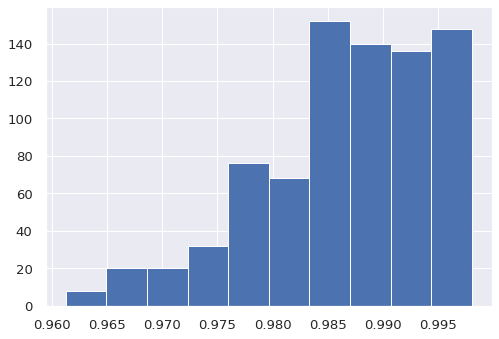

In [137]:
df['ARI'].hist()   

In [ ]:
from sklearn import metrics
gg = pd.DataFrame()
my_clust4 = KMeans(n_clusters=5, random_state=1)
my_clust4.fit(data_normalized)

for i in range(200):
    test = KMeans(n_clusters=5)
    test.fit_predict(data_normalized)
    ari = metrics.adjusted_rand_score(my_clust4.labels_, test.labels_)
    test = pd.DataFrame(test.cluster_centers_)
    test.columns = ['RecencyCor', 'FrequenceCor', 'MonetaryCor']
    test['Indice'] = i
    test['ARI'] = ari
    # Calcul du rand score qui doit etre proche de 1
    # car ils sont choisis aleatoirement
    gg = pd.concat([gg, test])

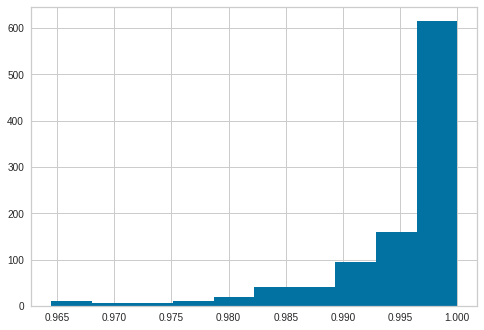

In [34]:
# gg['ARI'].hist()  keeping outliers

In [318]:
dataEtude=Olist_db.copy()

In [319]:
dataEtude['order_purchase_timestamp']=pd.to_datetime(dataEtude['order_purchase_timestamp'])

In [320]:
dataEtude['year']=dataEtude['order_purchase_timestamp'].dt.year

In [321]:
dataEtude['Date']=dataEtude['order_purchase_timestamp'].dt.strftime( "%Y-%m-%d")

In [322]:
dataEtude['Date']=pd.to_datetime(dataEtude['Date'])

In [323]:
dataEtude['Month_year']=dataEtude['order_purchase_timestamp'].dt.strftime( "%B-%Y")


In [324]:
data=pd.merge(dataEtude,rfmTable,on='customer_unique_id')

In [325]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn import metrics

In [335]:
i = (data['Month_year'] == 'June-2017') ^ (data['Month_year'] == 'July-2017')
jun_jul17 = data[i]
features = ['Recency', 'Frequency', 'Monetary']
index = jun_jul17.columns.isin(features)
dataModel_jun_jul17 = jun_jul17[jun_jul17.columns[index]]
# Standarisation
x_jun_jul17 = dataModel_jun_jul17.values
X_scaled_jun_jul17 = StandardScaler().fit_transform(x_jun_jul17)
# modele
model_jun_jul17 = KMeans(n_clusters=5)
model_jun_jul17.fit(X_scaled_jun_jul17)
# pred
pred_jun_jul17 = KMeans(n_clusters=5)
pred_jun_jul17.fit_predict(X_scaled_jun_jul17)
ARS_jun_jul17 = adjusted_rand_score(model_jun_jul17.labels_, pred_jun_jul17.labels_)

In [336]:
i = (data['Month_year'] == 'September-2017') ^ (data['Month_year'] == 'August-2017')
    
aug17_sep17 = data[i]
jun_sep17 = pd.merge(jun_jul17, aug17_sep17, how='outer')
features = ['Recency', 'Frequency', 'Monetary']
index = jun_sep17.columns.isin(features)
dataModel_jun_sep17 = jun_sep17[jun_sep17.columns[index]]
# Standarisation
x_jun_sep17= dataModel_jun_sep17.values
X_scaled_jun_sep17 = StandardScaler().fit_transform(x_jun_sep17)
# modele
model_jun_sep17 = KMeans(n_clusters=5)
model_jun_sep17.fit(X_scaled_jun_sep17)
# pred
pred_jun_sep17 = KMeans(n_clusters=5)
pred_jun_sep17.fit_predict(X_scaled_jun_sep17)
ARS_jun_sep17 = adjusted_rand_score(model_jun_sep17.labels_, pred_jun_sep17.labels_)

In [337]:
i = (data['Month_year'] == 'October-2017') ^ (data['Month_year'] == 'November-2017')
    
oct17_nov17 = data[i]
jun_nov17 = pd.merge(jun_jul17, oct17_nov17, how='outer')
features = ['Recency', 'Frequency', 'Monetary']
index = jun_nov17.columns.isin(features)
dataModel_jun_nov17 = jun_nov17[jun_nov17.columns[index]]
# Standarisation
x_jun_nov17= dataModel_jun_nov17.values
X_scaled_jun_nov17 = StandardScaler().fit_transform(x_jun_nov17)
# modele
model_jun_nov17 = KMeans(n_clusters=5)
model_jun_nov17.fit(X_scaled_jun_nov17)
# pred
pred_jun_nov17 = KMeans(n_clusters=5)
pred_jun_nov17.fit_predict(X_scaled_jun_nov17)
ARS_jun_nov17 = adjusted_rand_score(model_jun_nov17.labels_, pred_jun_nov17.labels_)

In [338]:
i = (data['Month_year'] == 'December-2017') ^ (data['Month_year'] == 'January-2018')
dec17_jan18 = data[i]
jun17_jan18 = pd.merge(jun_nov17, dec17_jan18, how='outer')
features = ['Recency', 'Frequency', 'Monetary']
index = jun17_jan18.columns.isin(features)
dataModel_jun17_jan18 = jun17_jan18[jun17_jan18.columns[index]]
# Standarisation
x_jun17_jan18= dataModel_jun17_jan18.values
X_scaled_jun17_jan18 = StandardScaler().fit_transform(x_jun17_jan18)
# modele
model_jun17_jan18 = KMeans(n_clusters=5)
model_jun17_jan18.fit(X_scaled_jun17_jan18)
# pred
pred_jun17_jan18 = KMeans(n_clusters=5)
pred_jun17_jan18.fit_predict(X_scaled_jun17_jan18)
ARS_jun17_jan18 = adjusted_rand_score(model_jun17_jan18.labels_, pred_jun17_jan18.labels_)

In [339]:
i = (data['Month_year'] == 'March-2018') ^ (data['Month_year'] == 'February-2018')
dec17_mar18 = data[i]
jun17_mar18 = pd.merge(jun17_jan18, dec17_mar18, how='outer')
features = ['Recency', 'Frequency', 'Monetary']
index = jun17_mar18.columns.isin(features)
dataModel_jun17_mar18 = jun17_mar18[jun17_mar18.columns[index]]
# Standarisation
x_jun17_mar18= dataModel_jun17_mar18.values
X_scaled_jun17_mar18 = StandardScaler().fit_transform(x_jun17_mar18)
# modele
model_jun17_mar18 = KMeans(n_clusters=5)
model_jun17_mar18.fit(X_scaled_jun17_mar18)
# pred
pred_jun17_mar18 = KMeans(n_clusters=5)
pred_jun17_mar18.fit_predict(X_scaled_jun17_mar18)
ARS_jun17_mar18 = adjusted_rand_score(model_jun17_mar18.labels_, pred_jun17_mar18.labels_)

In [340]:
i =  (data['Month_year'] == 'April-2018')^ (data['Month_year'] == 'May-2018')
apr18_may18 = data[i]
jun17_may18 = pd.merge(jun17_mar18, apr18_may18, how='outer')
features = ['Recency', 'Frequency', 'Monetary']
index = jun17_may18.columns.isin(features)
dataModel_jun17_may18 = jun17_may18[jun17_may18.columns[index]]
# Standarisation
x_jun17_may18= dataModel_jun17_may18.values
X_scaled_jun17_may18 = StandardScaler().fit_transform(x_jun17_may18)
# modele
model_jun17_may18 = KMeans(n_clusters=5)
model_jun17_may18.fit(X_scaled_jun17_may18)
# pred
pred_jun17_may18 = KMeans(n_clusters=5)
pred_jun17_may18.fit_predict(X_scaled_jun17_may18)
ARS_jun17_may18 = adjusted_rand_score(model_jun17_may18.labels_, pred_jun17_may18.labels_)

In [341]:
i = (data['Month_year'] == 'June-2018') ^ (data['Month_year'] == 'July-2018') 
jun18_aug18 = data[i]
jun17_aug18 = pd.merge(jun17_may18, jun18_aug18, how='outer')
features = ['Recency', 'Frequency', 'Monetary']
index = jun17_aug18.columns.isin(features)
dataModel_jun17_aug18 = jun17_aug18[jun17_aug18.columns[index]]
# Standarisation
x_jun17_aug18= dataModel_jun17_aug18.values
X_scaled_jun17_aug18 = StandardScaler().fit_transform(x_jun17_aug18)
# modele
model_jun17_aug18 = KMeans(n_clusters=5)
model_jun17_aug18.fit(X_scaled_jun17_aug18)
# pred
pred_jun17_aug18 = KMeans(n_clusters=5)
pred_jun17_aug18.fit_predict(X_scaled_jun17_aug18)
ARS_jun17_aug18 = adjusted_rand_score(model_jun17_aug18.labels_, pred_jun17_aug18.labels_)

In [342]:
sil5 = pd.DataFrame({'Period': ['2 months','4 months','6 months', '8 months', '10 months', '12 months','14 months'], 
                     'ARS': [ ARS_jun_jul17, ARS_jun_sep17, ARS_jun_nov17, ARS_jun17_jan18,
                             ARS_jun17_mar18, ARS_jun17_may18, ARS_jun17_aug18]})

Text(0.5, 1.0, 'Temporal Staibility')

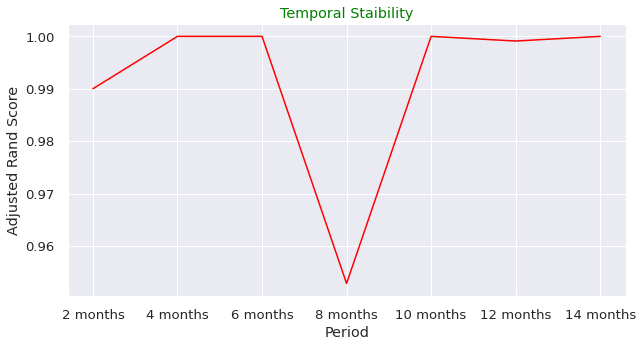

In [343]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))
plt.plot(sil5['Period'], sil5['ARS'], c='red')

plt.xlabel('Period')
plt.ylabel('Adjusted Rand Score')
plt.title('Temporal Staibility', color='green')

In [295]:
i=dataEtude['year']==2017
data2017=dataEtude[i]

In [296]:
i=dataEtude['Month_year']=='January-2018'
J2018=dataEtude[i]

In [297]:
data2017J=pd.merge(J2018,data2017,how='outer')

In [299]:
from sklearn.preprocessing import StandardScaler
features = ['Recency', 'Frequency', 'Monetary']
index = data2017J.columns.isin(features)
dataModel2017J = data2017J[data2017J.columns[index]]
# Standarisation
X2017J = dataModel2017J.values
X_scaled2017J = StandardScaler().fit_transform(X2017J)
Janvier2018 = cluster.KMeans(n_clusters=6)
Janvier2018.fit(X_scaled2017J)
silhjanvier = metrics.silhouette_score(X_scaled2017J, Janvier2018.labels_)

ValueError: ignored